In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib

In [3]:
help(load_digits)

Help on function load_digits in module sklearn.datasets.base:

load_digits(n_class=10, return_X_y=False)
    Load and return the digits dataset (classification).
    
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
    
    Read more in the :ref:`User Guide <datasets>`.
    
    Parameters
    ----------
    n_class : integer, between 0 and 10, optional (default=10)
        The number of classes to return.
    
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the in

In [4]:
raw = load_digits()

In [5]:
raw

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [6]:
rawData = raw["data"]
rawTarget = raw["target"]

In [7]:
X = rawData
y = rawTarget

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
classifier = GaussianNB()

In [10]:
scores = cross_val_score(classifier, X_train, y_train, cv = 10)

In [11]:
scores

array([ 0.82170543,  0.8359375 ,  0.859375  ,  0.84251969,  0.83464567,
        0.87401575,  0.792     ,  0.808     ,  0.78688525,  0.84033613])

In [12]:
fitted = classifier.fit(X_train, y_train)

In [13]:
predict = classifier.predict(X_test)

In [14]:
# check for unique labels

indices = set()
for l in predict:
    indices.add(l)
    l -= 2

print(indices)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [15]:
colors = ["red", "blue", "green", "black", "gold", "brown", "orange", "grey", "pink", "teal"] 

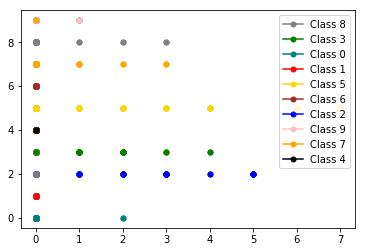

In [18]:
used = []

for i in np.arange(0, len(X_test)):
    col = colors[predict[i] -1]
    used += col
    if col not in used:
        plt.plot(X_test[:, 1][i], y_test[i], color = col, marker = "o",
                        markersize = 5, label = "Class %i" % predict[i])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = "upper right")
plt.show()

In [20]:
joblib.dump(fitted, "GuassianTitanic.pkl")

['GuassianTitanic.pkl']

In [21]:
pickledModel = joblib.load("GuassianTitanic.pkl")
predict = pickledModel.predict(X_test)

In [22]:
indices = set()

for l in predict:
    indices.add(l)
    l -= 2

print(indices)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


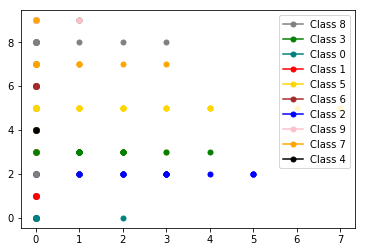

In [23]:
used = []

for i in np.arange(0, len(X_test)):
    col = colors[predict[i]-1]
    used += col
    if col not in used:
        plt.plot(X_test[:,1][i], y_test[i], color=col, marker='o', 
                 markersize=5, label="Class %i" % predict[i])

# cut out duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.show()